# PyTorch & Tensor

In [1]:
# loading packages
import matplotlib.pyplot as plt
import numpy as np
import torch
print(" torch: {} \n numpy: {}".format(torch.__version__, np.__version__))
print(" Use GPU? {}".format(torch.cuda.is_available()))

 torch: 1.8.1 
 numpy: 1.19.2
 Use GPU? True


# How to create a Tensor?

In [2]:
# create from list
x_list = [[1, 2, 3], [4, 5, 6]]
x = torch.Tensor(x_list)
print(x)

# create from numpy array(2 by 3)
x_numpy = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.Tensor(x_numpy)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
# back to list / numpy

# .tolist()
x_back2list = x.tolist()
print(type(x_back2list))

# .numpy()
x_back2numpy = x.numpy()
print(type(x_back2numpy))

<class 'list'>
<class 'numpy.ndarray'>


In [4]:
# device of tensor x
print("Tensor `x` device:", x.device)

device = 'cuda'
# use GPU
x = x.to(device)
print("after change the device, Tensor `x` device:", x.device)

device = 'cpu'
# CPU 사용
x = x.to(device)
print("after change the device, Tensor `x` device:", x.device)

Tensor `x` device: cpu
after change the device, Tensor `x` device: cuda:0
after change the device, Tensor `x` device: cpu


### create zero or one tensor like `x`

* `torch.zeros_like`: create tensor filled with 0 like x with same shape, data type and device 
* `torch.ones_like`: create tensor filled with 1 just like x with same shape, data type and device 

In [5]:
x_zeros = torch.zeros_like(x)
print(x_zeros.device)
print(x_zeros)

cpu
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Type of Tensor

- `.type()`: can use it to get the type of tensor

In [6]:
# float type tensor
a = torch.FloatTensor(np.array([[1, 2, 3], 
                                [4, 5, 6]]))

# integer type tensor
b = torch.LongTensor(np.array([[1, 2, 3], 
                               [4, 5, 6]]))

# 8 bit integer type tensor
c = torch.ByteTensor([1, 0, 1, 0])

# boolean type tensor
d = torch.BoolTensor([True, False, True, True])

for tensor in [a, b, c, d]:
    print(f"tensor type: {tensor.type()}")
    print(f"{tensor}\n")

tensor type: torch.FloatTensor
tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor type: torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])

tensor type: torch.ByteTensor
tensor([1, 0, 1, 0], dtype=torch.uint8)

tensor type: torch.BoolTensor
tensor([ True, False,  True,  True])



## Tensor Manipulation

<img src="http://drive.google.com/uc?export=view&id=1iYSUeya5LD4EtDg6Avu8QlvM2ByZbOp-" width="480px" height="480px" >

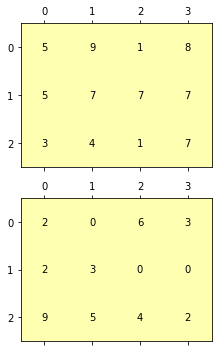

In [7]:
def draw_tensor(tensor, x):
    """tensor drawing"""
    fig, axes = plt.subplots(len(tensor), 1, figsize=(5, 5))
    for k in range(len(tensor)):
        axes[k].matshow(tensor.numpy()[k], vmin=0, vmax=1, cmap='summer', alpha=0.5)
        for (i, j), z in np.ndenumerate(x.numpy()[k]):
            axes[k].text(j, i, '{:d}'.format(z), ha='center', va='center')
    plt.tight_layout()
    plt.show()
    
# create a example tensor
torch.manual_seed(777)  # fix random seed
x = torch.randint(0, 10, size=(2, 3, 4))
mask = torch.ones_like(x)
draw_tensor(mask, x)

### view

usually use `view` method when you need to change into a feedable form for input

torch.Size([2, 2, 6])


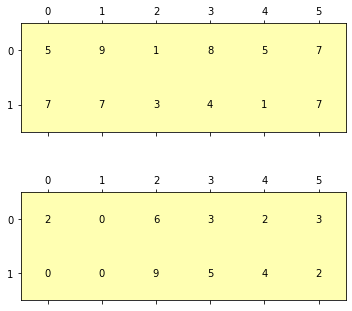

In [8]:
# tensor size (2, 3, 4) --> (2, 2, 6)
x_viewed1 = x.view(2, 2, 6)

# visualize tensor
print(x_viewed1.size())
mask = torch.ones_like(x_viewed1)
draw_tensor(mask, x_viewed1)

torch.Size([2, 1, 12])


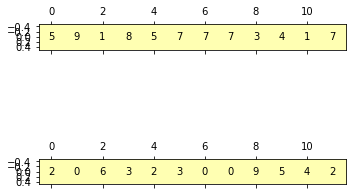

In [9]:
# tensor size (2, 3, 4) --> (2, 1, 12)
x_viewed2 = x.view(-1, 1, 12)

# visualize tensor
print(x_viewed2.size())
mask = torch.ones_like(x_viewed2)
draw_tensor(mask, x_viewed2)

### permute

torch.Size([4, 3, 2])


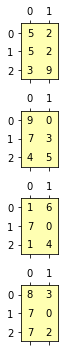

In [10]:
# tensor size (2, 3, 4) --> (4, 3, 2)
x_permuted = x.permute(2, 1, 0)

# visualize tensor
print(x_permuted.size())
mask = torch.ones_like(x_permuted)
draw_tensor(mask, x_permuted)

## squeeze & unsqueeze

* squeeze: remove which dimension size = 1
* unsqueeze: add new dimension

In [11]:
# create a tensor with size of (2, 1, 3, 4, 1)
x = torch.rand((2, 1, 3, 4, 1))  

# squeeze all channels which dimension equals 1
print(x.squeeze().size())  # check the size

# squeeze second channel which dimension equals 1
print(x.squeeze(1).size())  # check the size

# unsqueeze at 4-th dimension, number of dimension turns to 6
print(x.unsqueeze(3).size())  # check the size

torch.Size([2, 3, 4])
torch.Size([2, 3, 4, 1])
torch.Size([2, 1, 3, 1, 4, 1])


### cat & stack

In [12]:
def draw_tensor2(x):
    """tensor drawing cat&stack"""
    subplot_size = 1 if x.ndimension() <= 2 else x.size(0)
    fig, axes = plt.subplots(subplot_size, 1)
    if subplot_size == 1: 
        axes.matshow(x.numpy(), vmin=0, vmax=1, cmap='summer')
    else:
        for i in range(subplot_size):
            axes[i].matshow(x.numpy()[i], vmin=0, vmax=1, cmap='summer')
    plt.show()

tensor([[0.0819, 0.4911, 0.4033],
        [0.3859, 0.8813, 0.8811],
        [0.7242, 0.5033, 0.8249],
        [0.2634, 0.3112, 0.5948]])


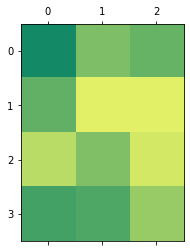

In [13]:
torch.manual_seed(777)
# create a tensor that has size of (2, 3)
A = torch.rand((2, 3))
B = torch.rand((2, 3))

# concatenate two tensors by first dimension
AB_cated = torch.cat([A, B], dim=0)
print(AB_cated)

# visualize tensor
draw_tensor2(AB_cated)

torch.stack([A, B], dim=0)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])
----------------------------------------
torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)

tensor([[[0.0819, 0.4911, 0.4033],
         [0.3859, 0.8813, 0.8811]],

        [[0.7242, 0.5033, 0.8249],
         [0.2634, 0.3112, 0.5948]]])


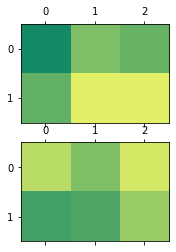

In [14]:
# stack two tensors by first dimension
AB_stacked = torch.stack([A, B], dim=0)
print("torch.stack([A, B], dim=0)\n")
print(AB_stacked)
print("----"*10)
print("torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)\n")
# It is same as unsqueeze all tensors with first dimension and then concatnate by first dimension
AB_unsqueeze_cat = torch.cat([A.unsqueeze(0), B.unsqueeze(0)], dim=0)
print(AB_unsqueeze_cat)

# visualize tensor
draw_tensor2(AB_stacked)

## Operations

### add / sub

$$\begin{aligned}
x = \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}\quad y = \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix}
\end{aligned}$$

operation between vector and scalar: 'broadcasting' will be applied

$$\begin{aligned}
x + 2 &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + 2 = \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + 2*\begin{bmatrix}1 \\ 1 \\ 1 \end{bmatrix} \\
&= \begin{bmatrix}1+2 \\ 2+2 \\ 3+2 \end{bmatrix} = \begin{bmatrix}3 \\ 4 \\ 5 \end{bmatrix}
\end{aligned}$$

operation between vector and vector

$$\begin{aligned}
x + y &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1+4 \\ 2+5 \\ 3+6 \end{bmatrix} = \begin{bmatrix}5 \\ 7\\ 9 \end{bmatrix}
\end{aligned}$$

In [15]:
# create two tensors
x = torch.Tensor([1, 2, 3])
y = torch.Tensor([4, 5, 6])

# addition
print(torch.add(x, y))

# subtraction
print(torch.sub(x, y))

# vector + scalar
print(x+2)

# vector - scalar
print(x-2)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([3., 4., 5.])
tensor([-1.,  0.,  1.])


### multiplication

element-wise product : $*$, $\odot$

$$\begin{aligned}
x * y &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix} * \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1*4 \\ 2*5 \\ 3*6 \end{bmatrix} = \begin{bmatrix}4 \\ 10 \\ 18 \end{bmatrix}
\end{aligned}$$

In [16]:
# multiplication
print(x * y)
print(torch.mul(x, y))

# division
print(x / y)
print(torch.div(x, y))

tensor([ 4., 10., 18.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])
tensor([0.2500, 0.4000, 0.5000])


inner product or dot product): $\cdot$

$$\begin{aligned}
x\cdot y = x^T y = \sum_i^N x_i * y_i &= \begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}^T \cdot \begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \end{bmatrix}\begin{bmatrix}4 \\ 5 \\ 6 \end{bmatrix} \\
&= 1 \times 4 + 2 \times 5 + 3 \times 6 = 4+10+18 = 32
\end{aligned}$$

In [17]:
print("inner product: ")
print(torch.dot(x, y))
print(x.dot(y))

inner product: 
tensor(32.)
tensor(32.)


matrix product

$$\begin{aligned}
X &= \begin{bmatrix}x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \end{bmatrix} = \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} 
\\ 
Y &= \begin{bmatrix}y_{11} & y_{12} \\ y_{21} & y_{22}\end{bmatrix} = \begin{bmatrix}7 & 9 \\ 8 & 10 \end{bmatrix}
\end{aligned}$$

Size of X: (3, 2), Size of Y: (2, 2) 

$$\begin{aligned}
X\cdot Y 
&= \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} \begin{bmatrix}7 & 9 \\ 8 & 10 \end{bmatrix} \\
&= \begin{bmatrix}
x_{1:}\cdot y_{:1} & \ x_{1:}\cdot y_{:2} \\
x_{2:}\cdot y_{:1} & \ x_{2:}\cdot y_{:2} \\
x_{3:}\cdot y_{:1} & \ x_{3:}\cdot y_{:2}
\end{bmatrix}
= \begin{bmatrix}
1\times 7 + 4 \times 8 & 1 \times 9 + 4 \times 10 \\
2\times 7 + 5 \times 8 & 2 \times 9 + 5 \times 10 \\
3\times 7 + 6 \times 8 & 3 \times 9 + 6 \times 10
\end{bmatrix}
\end{aligned}$$

In [19]:
# create X: size=(3, 2), Y: size=(2, 2)
X = torch.Tensor([[1, 4], 
                  [2, 5], 
                  [3, 6]])

Y = torch.Tensor([[7, 9], 
                  [8, 10]])

# matrix multiplication
print(torch.mm(X, Y))
print()
print(X.mm(Y))

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])

tensor([[39., 49.],
        [54., 68.],
        [69., 87.]])


### sum / mean

$$Z = \begin{aligned}
\begin{bmatrix}1 & 2 \\ 3 & 4 \end{bmatrix}\\
\begin{bmatrix}5 & 6 \\ 7 & 8 \end{bmatrix}
\end{aligned}$$

In [29]:
# create Z tensor with size of (2, 2, 2)
Z = torch.Tensor([[[1, 2], 
                   [3, 4]],
                  
                  [[5, 6], 
                   [7, 8]]])

# calculate summuation/average from all elements
Z_sum = torch.sum(Z)
Z_mean = torch.mean(Z)

print(f"sum: {Z_sum}")
print(f"mean: {Z_mean}")

sum: 36.0
mean: 4.5


if `dim` argument is given, will calculate through that dimension

$$\begin{aligned} 
sum(Z, dim=0) &= \begin{bmatrix}1+5 & 2+6 \\ 3+7 & 4+8 \end{bmatrix}= \begin{bmatrix}6 & 8 \\ 10 & 12 \end{bmatrix} \\
sum(Z, dim=1) &= \begin{bmatrix}1+3 & 2+4 \\ 5+7 & 6+8 \end{bmatrix}= \begin{bmatrix}4 & 6 \\ 12 & 14 \end{bmatrix} \\
sum(Z, dim=2) &= \begin{bmatrix}1+2 & 3+4 \\ 5+6 & 7+8 \end{bmatrix}= \begin{bmatrix}3 & 7 \\ 11 & 15 \end{bmatrix} \\
\end{aligned}$$

In [27]:
print(torch.sum(Z, dim=0))
print()
print(torch.mean(Z, dim=0))

tensor([[ 7.,  9.],
        [ 8., 12.]])

tensor([[3.5000, 4.5000],
        [4.0000, 6.0000]])


### max & argmax / min & argmin 

In [28]:
# find the maximum and arguments of the maxima from all elements
print("Z max:", torch.max(Z))
print("Z argmax:", torch.argmax(Z))

# find the minimum and arguments of the minima from all elements
print("Z min:", torch.min(Z))
print("Z argmin:", torch.argmin(Z))

Z max: tensor(8.)
Z argmax: tensor(7)
Z min: tensor(1.)
Z argmin: tensor(2)


if dim argument is given, will calculate through that dimension and return the tuple of (max, argmax) or (min, argmin)


$$max(Z, dim=1)=
\begin{aligned}
\begin{bmatrix} 
max\begin{pmatrix} 1\\ 3 \end{pmatrix} & max\begin{pmatrix} 2\\ 4 \end{pmatrix} \end{bmatrix} \\
\begin{bmatrix}
max\begin{pmatrix} 5\\ 7 \end{pmatrix} & max\begin{pmatrix} 6\\ 8 \end{pmatrix}
\end{bmatrix} 
\end{aligned}
= \begin{bmatrix} 3 & 4 \\ 7 & 8 \end{bmatrix}
$$

In [30]:
Z_max, Z_argmax = torch.max(Z, dim=1)
Z_min, Z_argmin = torch.min(Z, dim=1)
print("Z max:\n", Z_max)
print("Z argmax:\n", Z_argmax)
print()
print("Z min:\n", Z_min)
print("Z argmin:\n", Z_argmin)

Z max:
 tensor([[3., 4.],
        [7., 8.]])
Z argmax:
 tensor([[1, 1],
        [1, 1]])

Z min:
 tensor([[1., 2.],
        [5., 6.]])
Z argmin:
 tensor([[0, 0],
        [0, 0]])


### logical operation

will return boolean tensors

In [31]:
z = torch.Tensor([-3, 2, 0])

print("equal to 0")
print(z.eq(0))
print(z == 0)
print()

print("great than or equal to 0")
print(z.ge(0))
print(z >= 0)
print()

print("great than 0")
print(z.gt(0))
print(z > 0)
print()

print("less than or equal to 0")
print(z.le(0))
print(z <= 0)
print()

print("less than 0")
print(z.lt(0))
print(z < 0)

equal to 0
tensor([False, False,  True])
tensor([False, False,  True])

great than or equal to 0
tensor([False,  True,  True])
tensor([False,  True,  True])

great than 0
tensor([False,  True, False])
tensor([False,  True, False])

less than or equal to 0
tensor([ True, False,  True])
tensor([ True, False,  True])

less than 0
tensor([ True, False, False])
tensor([ True, False, False])


---

# Perceptron

In [32]:
def activation(x):
    return (x > 0).float()

# AND gate
def AND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# NAND gate
def NAND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# AND gate
def OR(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# create weights for each gate
w_and = torch.FloatTensor([0.5, 0.5])  
b_and = torch.FloatTensor([-0.7])
w_nand = torch.FloatTensor([-0.5, -0.5])  
b_nand = torch.FloatTensor([0.7])
w_or = torch.FloatTensor([0.5, 0.5]) 
b_or = torch.FloatTensor([-0.2])

# 입력 텐서를 만들어 결과 확인
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in X:
    print(f"input : {x.long().tolist()}")
    print(" - AND:", AND(x, w=w_and, b=b_and).item())
    print(" - NAND:", NAND(x, w=w_nand, b=b_nand).item())
    print(" - OR:", OR(x, w=w_or, b=b_or).item())
    print("--"*15)

input : [0, 0]
 - AND: 0.0
 - NAND: 1.0
 - OR: 0.0
------------------------------
input : [0, 1]
 - AND: 0.0
 - NAND: 1.0
 - OR: 1.0
------------------------------
input : [1, 0]
 - AND: 0.0
 - NAND: 1.0
 - OR: 1.0
------------------------------
input : [1, 1]
 - AND: 1.0
 - NAND: 0.0
 - OR: 1.0
------------------------------


## Understanding Perceptron with other perspect

Understand AND, NAND & OR gates by figures. Can treat as a linear classifier that classify two kinds of points.

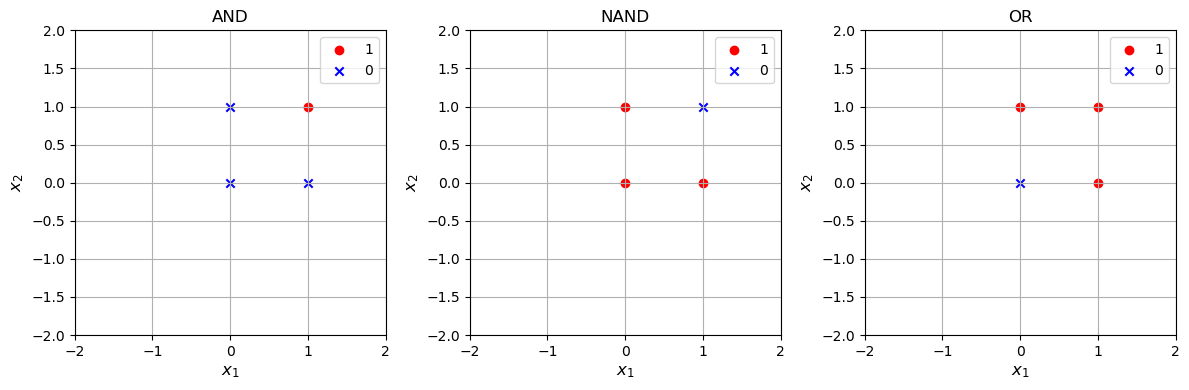

In [33]:
def plot_dots(ax, gate_func):
    x = [(0, 0), (1, 0), (0, 1), (1, 1)]
    if (gate_func.__name__ == "AND"):
        marker_o = list(zip(*x[3:]))
        marker_x = list(zip(*x[:3]))
    elif (gate_func.__name__ == "NAND"):
        marker_o = list(zip(*x[:3]))
        marker_x = list(zip(*x[3:]))
    elif (gate_func.__name__ == "OR"):
        marker_o = list(zip(*x[1:]))
        marker_x = list(zip(*x[:1]))
    elif (gate_func.__name__ == "XOR"):
        marker_o = list(zip(*x[1:3]))
        marker_x = list(zip(*x[::3]))
    else:
        return "gate_func error"
    
    ax.scatter(marker_o[0], marker_o[1], c='r', marker='o', label='1')
    ax.scatter(marker_x[0], marker_x[1], c='b', marker='x', label='0')
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_title(gate_func.__name__)
    ax.grid()
    ax.set_xlabel("$x_1$", fontsize=12)
    ax.set_ylabel("$x_2$", fontsize=12)
    
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func in zip(axes, [AND, NAND, OR]):
    plot_dots(ax=ax, gate_func=func)
plt.tight_layout()
plt.show()

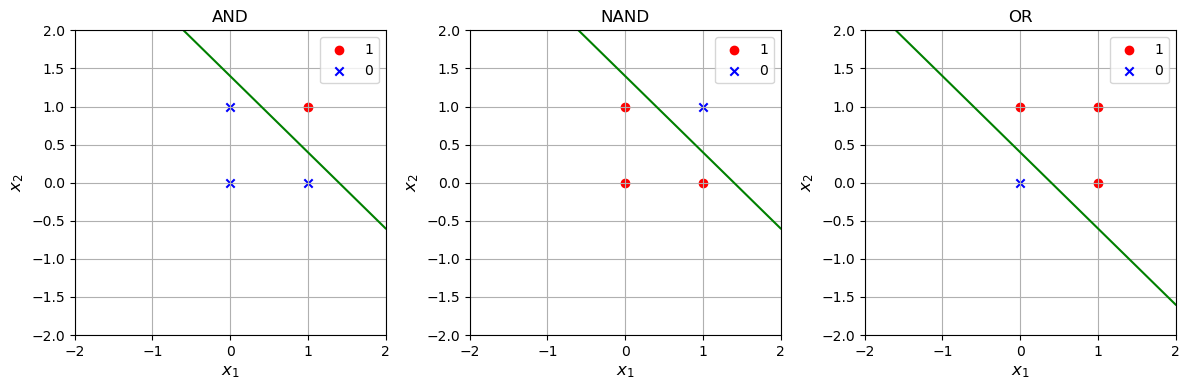

In [34]:
def plot_line(**kwargs):
    """x2 = (-w1*x1 - b) / w2"""
    x1 = [-2, 2]
    w = kwargs['w']
    b = kwargs['b']
    get_x2 = lambda x: (-w[0]*x - b) / w[1]
    # plot
    ax=kwargs['ax']
    ax.plot(x1, [get_x2(x1[0]), get_x2(x1[1])], c='g')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func, (w, b) in zip(axes, [AND, NAND, OR], [(w_and, b_and), (w_nand, b_nand), (w_or, b_or)]):
    plot_dots(ax=ax, gate_func=func)
    plot_line(ax=ax, w=w, b=b)
plt.tight_layout()
plt.show()

## XOR Problem

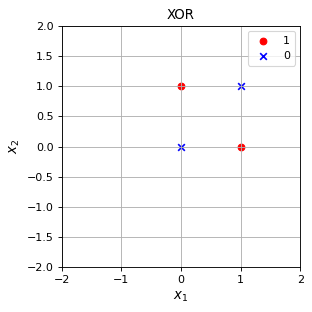

In [36]:
def XOR():
    """empty function"""
    pass

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=80)
plot_dots(ax=ax, gate_func=XOR)
plt.tight_layout()
plt.show()

In [38]:
def solution(x, **kwargs):
    # hidden layer 
    s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
    s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
    # output layer: concatnate s1 and s2 into new input
    y = AND(torch.Tensor([s1, s2]), w=kwargs['w_and'], b=kwargs['b_and'])
    return y

# create all possible inputs and targets for XOR gates
input_data = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
target_data = torch.FloatTensor([0, 1, 1, 0])

kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand), 
               ('w_or', w_or), ('b_or', b_or), 
               ('w_and', w_and), ('b_and', b_and)])

# test
for x, y in zip(input_data, target_data):
    pred = solution(x, **kwargs)
    print(f"predict: {pred.byte().item()} | target: {y.byte().item()}")

predict: 0 | target: 0
predict: 1 | target: 1
predict: 1 | target: 1
predict: 0 | target: 0


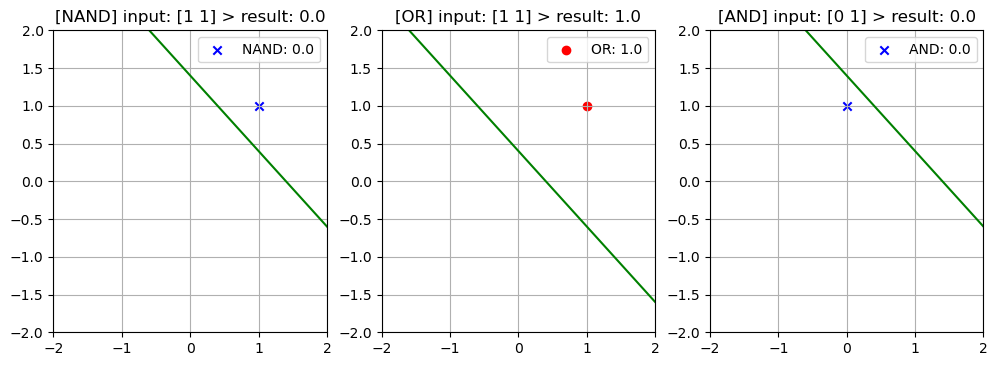

In [39]:
def draw_solution(x, w, b, ax, func):
    s = func(x, w=w, b=b).item()
    marker_shape = 'o' if s == 1 else 'x'
    marker_color = 'r' if s == 1 else 'b'
    ax.scatter(x.numpy()[0], x.numpy()[1], c=marker_color, marker=marker_shape, label='{}: {}'.format(func.__name__, s))
    plot_line(ax=ax, w=w, b=b)
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid()
    ax.set_title('[{}] input: {} > result: {}'.format(func.__name__, x.long().numpy(), s))
    
def draw_solution_by_step(x, **kwargs):
    NAND = kwargs['f_nand']
    OR = kwargs['f_or']
    AND = kwargs['f_and']
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
    s = torch.FloatTensor([NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand']), 
                           OR(x, w=kwargs['w_or'], b=kwargs['b_or'])])
    draw_solution(x, w=kwargs['w_nand'], b=kwargs['b_nand'], ax=axes[0], func=NAND)
    draw_solution(x, w=kwargs['w_or'], b=kwargs['b_or'], ax=axes[1], func=OR)
    draw_solution(s, w=kwargs['w_and'], b=kwargs['b_and'], ax=axes[2], func=AND)

x = torch.FloatTensor([1, 1])
kwargs.setdefault('f_nand', NAND)
kwargs.setdefault('f_or', OR)
kwargs.setdefault('f_and', AND)
draw_solution_by_step(x, **kwargs)

In [44]:
def draw_gate_area():
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    get_x2 = lambda x, w, b: (-w[0]*x - b) / w[1]
    w_nand, b_nand = [-0.5, -0.5], 0.7
    w_or, b_or = [0.5, 0.5], -0.2
    xx = np.linspace(-2, 2)
    y_nand = get_x2(xx, w=w_nand, b=b_nand)
    y_or = get_x2(xx, w=w_or, b=b_or)
    ax.fill_between(xx, y_nand, y_or, facecolor='g', alpha=0.3)
    plot_dots(ax=ax, gate_func=XOR)
    plot_line(ax=ax,  w=w_nand, b=b_nand)
    plot_line(ax=ax,  w=w_or, b=b_or)
    plt.tight_layout()
    plt.show()

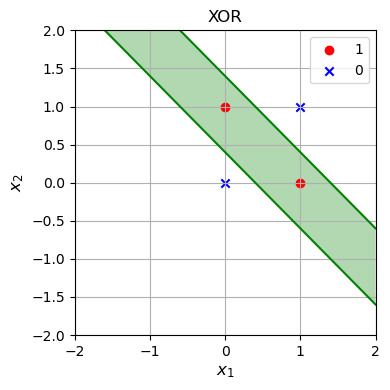

In [45]:
draw_gate_area()

---

# Feedforward Neural Network

## Activation Function

* `torch.sigmoid`, `torch.tanh`, `torch.relu`

In [49]:
import torch
import torch.nn as nn

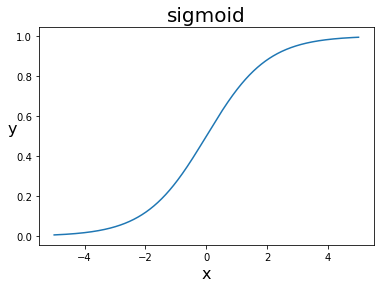

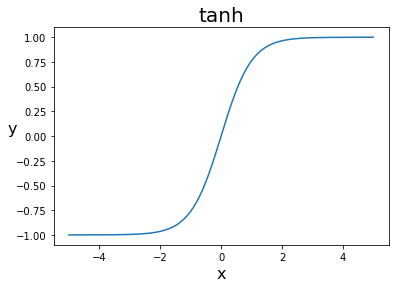

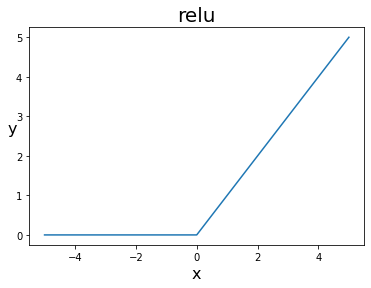

In [47]:
def draw_function(func, return_fig=False):
    xx = torch.linspace(-5, 5, steps=1000)
    fig = plt.figure()
    plt.plot(xx.numpy(), func(xx).numpy())
    plt.xlabel("x", fontdict={"fontsize":16})
    plt.ylabel("y", fontdict={"fontsize":16}, rotation=0)
    plt.title(f"{func.__name__}", fontdict={"fontsize":20})
    plt.show()
    
draw_function(torch.sigmoid)
draw_function(torch.tanh)
draw_function(torch.relu)


## Forward propagation: Solve XOR Problem

<img src="http://drive.google.com/uc?export=view&id=1SyY6F6-P2WZ7Hna6RQu7tnaQfgCsF_Ry" width="480px" height="480px" >

### Create a Network using Tensor operation

In [59]:
torch.manual_seed(70)
# create a sample input that has size of (1, 2)
x = torch.Tensor([[0, 1]])

# Input > Hidden1
# define hidden layer parameters: W1 and b1
W1 = torch.rand((3, 2))  
b1 = torch.rand((1, 3))  

# forward
# (1, 2) x (2, 3) + (1, 3) = (1, 3)
z1 = torch.mm(x, W1.t()) + b1  
a1 = torch.sigmoid(z1)

# Hidden1 > Hidden2
# 은닉층 가중치 정의
# 0과 1 사이에서 무작위로 뽑아서 W2, b2 텐서 생성
W2 = torch.rand((2, 3))  
b2 = torch.rand((1, 2))  

# forward
# (1, 3) x (3, 2) + (1, 2) = (1, 2)
z2 = torch.mm(a1, W2.t()) + b2  
a2 = torch.sigmoid(z2)

# Hidden > Output
# 출력층 가중치 초기화
W3 = torch.rand((2, 2))  
b3 = torch.rand((1, 2))

# 출력층 층 forward
# (1, 2) x (2, 2) + (1, 2) = (1, 2)
def identity_func(x):
    """항등 함수"""
    return x

z3 = torch.mm(a2, W3.t()) + b3  
y = identity_func(z3)

print(y)
if y[0, 0] > y[0, 1]:
    print("It's 0")
else:
    print("It's 1")

tensor([[1.8293, 1.0240]])
It's 0


### Create a Network using Module & Container

All objects related to neural network are in `torch.nn` module.

Creating a Deep Neural Network in PyTorch is same as stacking a layer one by one.

<img src="http://drive.google.com/uc?export=view&id=1tSHTZLkpV4Qak7KjO0DafB1RsqL7xyDq" width="180px" height="240px" >

All leranable parameters are in the layer class.

PyTorch Document: 

* [torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear)
* [torch.nn.Sigmoid](https://pytorch.org/docs/stable/nn.html#sigmoid)

In [50]:
# All learnable tensors are tracked by `requires_grad=True` Flag
layer = nn.Linear(in_features=2, out_features=2)
layer.weight

Parameter containing:
tensor([[ 0.5068, -0.1696],
        [-0.6171, -0.1940]], requires_grad=True)

In [52]:
# when a layer defined it can be use like a function in python
x = torch.FloatTensor([[0, 1]])
layer(x)

tensor([[-0.8144, -0.6347]], grad_fn=<AddmmBackward>)

### Containers

[Containers](https://pytorch.org/docs/stable/nn.html#containers): `nn.Module`, `nn.Sequential`, `nn.Modulelist`, `nn.ModuleDict`


Need to supercharge `nn.Module` class, and create `__init__` & `forward`(equal to `__call__` in PyTorch) function.

```python
class NetworkName(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.linear = nn.Linear(input_size, hidden_size)
        
    def forward(self, x):
        # forward propagation
        x = self.linear(x)
        return x
        
```

In [55]:
torch.manual_seed(70)

class XOR(nn.Module):
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()
        # build a layer
        self.linear1 = nn.Linear(in_features=2, out_features=3)   
        self.linear2 = nn.Linear(in_features=3, out_features=2)
        self.linear3 = nn.Linear(in_features=2, out_features=2)
        self.activation_layer = nn.Sigmoid()
        self.identity_layer = nn.Identity()
    
    def forward(self, x):
        # forward propagation
        z1 = self.linear1(x)
        a1 = self.activation_layer(z1)
        z2 = self.linear2(a1)
        a2 = self.activation_layer(z2)
        z3 = self.linear3(a2)
        y = self.identity_layer(z3)
        return y

In [56]:
# create XOR class instance
model = XOR()
y = model(x)  # model.forward(x)
print(y)

tensor([[ 0.6322, -0.4525]], grad_fn=<AddmmBackward>)


### nn.Sequential

It's uncomfortable to assign every layer

```python
self.linear1 = nn.Linear(in_features=2, out_features=3)   
self.linear2 = nn.Linear(in_features=3, out_features=2)
self.linear3 = nn.Linear(in_features=2, out_features=2)
self.activation_layer = nn.Sigmoid()
self.identity_layer = nn.Identity()
```

Use `nn.Sequential` container to bind them all. `nn.Sequential` is like a list, it will automatically called by order.

In [53]:
torch.manual_seed(70)

class XOR(nn.Module):
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()
        # create a Sequential layer
        self.layers = nn.Sequential(
            nn.Linear(2, 3),  # in_features, out_features
            nn.Sigmoid(),
            nn.Linear(3, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            nn.Identity()
        )

    def forward(self, x):
        # forward propagation
        y = self.layers(x)
        return y

In [54]:
# create XOR class instance
model = XOR()
y = model(x)  # model.forward(x)
print(y)

tensor([[ 0.6322, -0.4525]], grad_fn=<AddmmBackward>)


---

# Training a Neural Network

## Softmax Layer

If output of network is just scores for each class, then

1. It is unbounded: can be arbitrarily large.
2. Hard to interpret: how good is it?

It’d be better if we get a bounded score between 0 and 1, so that we can interpret it as a probability.

$$y_i = \text{Softmax}(z_i) = \dfrac{\exp(z_i)}{\sum_j^k \exp(z_j)}$$

* PyTorch Docs: [softmax](https://pytorch.org/docs/stable/nn.html#softmax)

In [60]:
x = torch.FloatTensor([3, 1, 5, 9])
prob = torch.softmax(x, dim=0)
print(f"{prob.numpy().round(3)}")

[0.002 0.    0.018 0.979]


In [62]:
softmax_layer = nn.Softmax(dim=1)
# x contains 2 data with 4 classes scores
x = torch.FloatTensor([[3, 1, 5, 9], 
                       [4, 6, 5, 3]])
print(x.size())
prob = softmax_layer(x)
print(f"{prob.numpy().round(3)}\n")

torch.Size([2, 4])
[[0.002 0.    0.018 0.979]
 [0.087 0.644 0.237 0.032]]



Usually, softmax sometimes converge to 0 and use log form of softmax `torch.log_softmax` to avoid underflow.

In [63]:
torch.log_softmax(x, dim=1)

tensor([[-6.0209, -8.0209, -4.0209, -0.0209],
        [-2.4402, -0.4402, -1.4402, -3.4402]])

## Loss Function

XOR Problem can be treat as classfication problem with 2 classes. So need a softmax layer at the end. However it is already contained in `nn.CrossEntropyLoss`.

In [64]:
torch.manual_seed(70)

class XOR(nn.Module):
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()
        # create a Sequential layer
        self.layers = nn.Sequential(
            nn.Linear(2, 3),  # in_features, out_features
            nn.Sigmoid(),
            nn.Linear(3, 2),
            nn.Sigmoid(),
            nn.Linear(2, 2),
            # nn.Softmax(dim=1)
        )

    def forward(self, x):
        # forward propagation
        y = self.layers(x)
        return y
    
    def predict(self, x):
        o = self.forward(x)
        y = torch.softmax(o, dim=1)
        return y > 0.5

In [66]:
# create example input and target    
x = torch.FloatTensor([[0, 1]])
t = torch.LongTensor([0])  # target must be LongType Tensor

# create XOR class instance
model = XOR()

# Loss function
loss_function = nn.CrossEntropyLoss()

# feed forward propagation
y = model(x)

# calculate loss
loss = loss_function(y, t)

print(f"loss value: {loss.item()}")

loss value: 0.3809916377067566


### Special case: binary class

XOR Problem is also binary classification problem. Can use binary cross entropy loss, but the output size of model should be 1, not the number of classes.

- `nn.BCEWithLogitsLoss`
- `nn.BCELoss`

In [85]:
torch.manual_seed(70)

class XOR(nn.Module):
    """XOR Network"""
    def __init__(self):
        super(XOR, self).__init__()
        # create a Sequential layer
        self.layers = nn.Sequential(
            nn.Linear(2, 3),  # in_features, out_features
            nn.Sigmoid(),
            nn.Linear(3, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),  # output of last layer should be 1 if use binary cross entropy loss in XOR problem
        )

    def forward(self, x):
        # forward propagation
        y = self.layers(x)
        return y
    
    def predict(self, x):
        o = self.forward(x)
        y = torch.softmax(o, dim=1)
        return (y > 0.5).int()

In [86]:
# create example input and target    
x = torch.FloatTensor([[0, 1]])
t = torch.FloatTensor([0])  # target must be FloatTensor: target means probability here

# create XOR class instance
model = XOR()

# Loss function
loss_function_bce_logits = nn.BCEWithLogitsLoss()
loss_function_bce = nn.BCELoss()

# feed forward propagation
y = model(x)

# calculate loss
loss_bce_logits = loss_function_bce_logits(y.view(-1), t)
loss_bce = loss_function_bce(torch.sigmoid(y).view(-1), t)

print(f"loss value(bce_logits): {loss_bce_logits.item()}")
print(f"loss value(bce): {loss_bce.item()}")

loss value(bce_logits): 0.6285644769668579
loss value(bce): 0.6285644769668579


## nn.AutoGrad

AutoGrad packages help calculate the gradient of Tensor automatically. Each tensor has `requires_grad` attribute to know whether it needs to track the gradient or not. If call `requires_grad_` method, tensor will be turn the tracking gradient flag on.

* letter "\_" behind a function is in-place operations, it will overwrite some operation on the existed memory, not allocating a new memory Better not to use is if not necessary in PyTorch ([link](https://pytorch.org/docs/stable/notes/autograd.html#in-place-operations-with-autograd))

In [87]:
x = torch.FloatTensor([10])

print(f"require gradient? {x.requires_grad}\n")
# requires_grad
x.requires_grad_(True)
print(f"require gradient? {x.requires_grad}")
print(x)

require gradient? False

require gradient? True
tensor([10.], requires_grad=True)


<img src="http://drive.google.com/uc?export=view&id=1ZRAUVozDgH7-4PifPIzI7j15VHXsz8UR" width="890px" height="480px" >

draw a computational graph, just to know how it works in backend

$$\begin{aligned}
c(a, b) &= a + b\\
d(b) &= 2\times b + 1\\
e(c, d) &= c\times d 
\end{aligned} \\ \ \\ \text{where } a=2, b=3$$

if a gradient required tensor is in the computational path, other tensors will automaticall turn the `requires_grad` flag to `True` and the gradient function `grad_fn`

In [151]:
a = torch.FloatTensor([2]).requires_grad_(True)
# a.requires_grad_()
# a.retain_grad()
b = torch.FloatTensor([3])
c = a + b
d = 2 * b + 1
e = c * d

print(f"require gradient?")
for t, name in zip([a, b, c, d, e], ["a", "b", "c", "d", "e"]):
    print(f"  - {name}(={t.item()}): {t.requires_grad} \t/ grad_fn: \t {t.grad_fn}")
    
    # just needed to get all gradient in the path(non-leaf tensors)
    if t.requires_grad:
        t.retain_grad()

require gradient?
  - a(=2.0): True 	/ grad_fn: 	 None
  - b(=3.0): False 	/ grad_fn: 	 None
  - c(=5.0): True 	/ grad_fn: 	 <AddBackward0 object at 0x7f2878e06c90>
  - d(=7.0): False 	/ grad_fn: 	 None
  - e(=35.0): True 	/ grad_fn: 	 <MulBackward0 object at 0x7f2878e5df90>


to calculate the gradient, just pass the gradient to `backward` method. you can see each gradient is in tensors' `.grad` attribute.

In [152]:
gradient = torch.FloatTensor([1.])
e.backward(gradient)

print(f"gradient")
for t, name in zip([a, b, c, d, e], ["a", "b", "c", "d", "e"]):
    print(f"  - {name}: {t.grad}")

gradient
  - a: tensor([7.])
  - b: None
  - c: tensor([7.])
  - d: None
  - e: tensor([1.])


## torch.optim

All objects that related to optimizations are in `torch.optim`. You need to regist parameters to optimizer by calling `model.parameters()` to optimize them. 

In [ ]:
import torch.optim as optim

# 입력텐서 타겟 텐서 생성    
x = torch.Tensor([[0, 1]])
t = torch.LongTensor([0])

# 커스텀 모듈 호출
model = XOR()

# 손실함수
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 순방향전파
y = model(x)

# 손실값 계산
loss = loss_function(y, t)

# 역전파
loss.backward()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5068, -0.1696],
         [-0.6171, -0.1940],
         [-0.6448, -0.4407]], requires_grad=True), Parameter containing:
 tensor([ 0.6366, -0.3092, -0.1563], requires_grad=True), Parameter containing:
 tensor([[-0.1293, -0.3335,  0.3731],
         [-0.1220, -0.4077, -0.4230]], requires_grad=True), Parameter containing:
 tensor([-0.2977, -0.1532], requires_grad=True), Parameter containing:
 tensor([[ 0.1535,  0.5105],
         [-0.5054,  0.1989]], requires_grad=True), Parameter containing:
 tensor([-0.2185, -0.6025], requires_grad=True)]

옵티마이저의 `.step()` 함수를 호출하면 옵티마이저가 해당 매개변수를 업데이트 해준다.

In [ ]:
print("첫번째 Linear Layer Weight: ")
print(model.layers[0].weight)
print()
print("첫번째 Linear Layer Weight의 Gradient: ")
print(model.layers[0].weight.grad)
print()

optimizer.step()

print("첫번째 Linear Layer Weight의 Gradient: ")
print(model.layers[0].weight)

첫번째 Linear Layer Weight: 
Parameter containing:
tensor([[-0.1971,  0.3524],
        [ 0.1332,  0.3146],
        [-0.3497,  0.0584]], requires_grad=True)

첫번째 Linear Layer Weight의 Gradient: 
tensor([[-0.0000, -0.0010],
        [ 0.0000,  0.0074],
        [-0.0000, -0.0082]])

첫번째 Linear Layer Weight의 Gradient: 
Parameter containing:
tensor([[-0.1971,  0.3525],
        [ 0.1332,  0.3138],
        [-0.3497,  0.0592]], requires_grad=True)


경사하강법 $$ W^{(1)}_{new} = W^{(1)}_{old} - \alpha \dfrac{\partial L}{\partial W^{(1)}}_{old}$$

In [ ]:
print(f" w_22 의 파라미터 업데이트: w ={0.3146 - 0.1 * (0.0074): .4f}")

 w_22 의 파라미터 업데이트: w = 0.3139


## XOR 문제 학습하기

In [ ]:
torch.manual_seed(70)

device = "cuda" if torch.cuda.is_available() else "cpu"  # gpu 사용 여부
n_step = 10000  # 총 학습 스텝

# Data 세트 만들기
inputs = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
targets = torch.LongTensor([0, 1, 1, 0])

# 모델 생성: gpu를 사용하려면 모델에도 device를 전달해준다.
model = XOR().to(device)
# 손실함수 정의
loss_function = nn.CrossEntropyLoss()
# 옵티마이저 정의
optimizer = optim.SGD(model.parameters(), lr=0.7)

# GPU를 사용하려면 입력 텐서에도 device를 전달해준다.
inputs, targets = inputs.to(device), targets.to(device)

best_loss = 999
# n_step 동안 학습을 진행한다.
for step in range(n_step):
    # -- 훈련단계 --
    train_loss = 0
    
    # 매개변수 텐서의 grad 정보를 0으로 만든다. model.zero_grad() 로도 가능하다.
    optimizer.zero_grad()
    
    # 순방향전파(Forward Propagation)
    outputs = model(inputs)
    
    # Loss 계산
    loss = loss_function(outputs, targets)
    
    # 역방향전파(Back Propagation)
    loss.backward()
    
    # 옵티마이저로 매개변수 업데이트
    optimizer.step()
    
    # 훈련단계 손실값 기록(모든 데이터에 손실값의 평균을 합친다.)
    train_loss += loss.item()
    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "xor.pt")
    if step % 1000 == 0:
        print(f"[{step+1}] Loss: {train_loss:.4f}")

[1] Loss: 0.8337
[1001] Loss: 0.6932
[2001] Loss: 0.6932
[3001] Loss: 0.6931
[4001] Loss: 0.6931
[5001] Loss: 0.6931
[6001] Loss: 0.6931
[7001] Loss: 0.6927
[8001] Loss: 0.0309
[9001] Loss: 0.0032


In [ ]:
model.state_dict()

OrderedDict([('layers.0.weight', tensor([[ 1.2730,  0.5956],
                      [-3.1124, -3.5019],
                      [-5.5307, -5.3661]], device='cuda:0')),
             ('layers.0.bias',
              tensor([-0.6217,  4.9397,  2.0589], device='cuda:0')),
             ('layers.2.weight', tensor([[-0.5659,  1.2677, -1.8566],
                      [-2.8928,  6.1726, -7.4217]], device='cuda:0')),
             ('layers.2.bias', tensor([-0.6035, -1.0970], device='cuda:0')),
             ('layers.4.weight', tensor([[-1.1127, -6.9834],
                      [ 0.8168,  8.1486]], device='cuda:0')),
             ('layers.4.bias', tensor([ 3.9442, -4.0051], device='cuda:0'))])

## 모델 사용하기

In [ ]:
# 모델 새로 정의
model = XOR()
# 모델 불러오기
model.load_state_dict(torch.load("xor.pt", map_location="cpu"))

probs = model.predict(inputs.cpu())
print(probs)
predicts = probs.argmax(1)
print(predicts)
for prob, pred in zip(probs, predicts):
    print(f"prob: {prob.data}\t predict {pred}")

tensor([[0.9984, 0.0016],
        [0.0015, 0.9985],
        [0.0013, 0.9987],
        [0.9977, 0.0023]], grad_fn=<SoftmaxBackward>)
tensor([0, 1, 1, 0])
prob: tensor([0.9984, 0.0016])	 predict 0
prob: tensor([0.0015, 0.9985])	 predict 1
prob: tensor([0.0013, 0.9987])	 predict 1
prob: tensor([0.9977, 0.0023])	 predict 0
